<a href="https://colab.research.google.com/github/Sylver640/ADA-Informes/blob/main/Informe_CutRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema (corte de varillas)
**Entrada:** Largo de varilla $n$, vector de precios por cada medida $i = 1,...,n$.

**Salida:** Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

Porque también los algoritmos pueden solucionar situaciones de la cotidianidad, en esta ocasión supongamos que tenemos una compañía que vende **varillas de metal**. Para ello compramos varillas largas y cortas, que luego se cortan en varillas aún más pequeñas, cada medida teniendo su propio valor, tal como se ve en la siguiente tabla de ejemplo:

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F19c92da5-a1d0-4a76-b35c-6ba829aab554%2FUntitled.png?table=block&id=f1440f99-65ce-4bf7-9906-f6980a4b4ae5&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=1010&userId=&cache=v2)

En ella observamos como va variando el valor de cada corte en un rango $i = [1,10]$, naturalmente incrementando mientras mayor sea el tamaño del corte. Con esta información, ahora debemos encontrar cuál es el retorno máximo que podemos obtener cortando dicha varilla.

![image](https://i.imgur.com/eTMXAYG.gif)

Veremos cómo esto es posible con una forma de programar un tanto interesante: **la programación dinámica**. Este paradigma, al igual que "divide y vencerás", se encargan de resolver el problema combinando las soluciones de cada sub-problema. Sin embargo, algo que diferencia a la primera de esta última es que solo se aplica cuando se **comparten los subsubproblemas**, calculando cada uno tan solo una vez y guardar su solución en una "tabla", lo cual nos evitaría hacer trabajo redundante. En el caso de nuestro problema, observamos que esto sí sucede, puesto que necesitamos el valor previo a la longitud que estamos analizando en dicho momento.

#2. Problema del corte de varilla

##2.1 Código
A continuación, se muestra la implementación del algoritmo que soluciona el problema indicado de dos maneras: recursiva (**Naive Implementation**) y por medio de programación dinámica (**acercamiento bottom-up**).

In [315]:
import random
from termcolor import cprint

comparisons = 0
s_recursivo = []
subproblems = 0

#Función que retorna el máximo de dos números
def findMax(a,b):
  if a > b:
    return a
  else:
    return b

#Implementación recursiva del algoritmo
def cutRod_naiveImplementation(prices, n, verbose):
  #Se llaman a las variables globales
  global comparisons
  global necessaryCuts
  #Se retorna el caso base, es decir, si la longitud del arreglo recibido es menor o igual a 0
  if (n <= 0):
    if verbose == True: print("Se retorna caso base (longitud n = 0)")
    return 0
  
  q = -9999999 #Se define a q como un número muy pequeño para encontrar el máximo con más "facilidad"

  #Se entra en el ciclo para recorrer todo el arreglo
  for i in range(1, n+1):
    if verbose == True:
      print(f"i = {i}")
      print(f"Longitud actual: {n}")
      print(f"Longitud para la recursión siguiente: {n-i}")
    #Se calcula el coste en aquella iteración, que es igual a la suma entre precios[i] y una llamada recursiva a la función con tal de
    #calcular nuevamente los subproblemas anteriores.
    cost = prices[i-1] + naiveImplementation(prices, n - i, verbose)
    if (cost > q): #Si este valor es mayor a q, éste será ahora nuestro nuevo retorno máximo
      q = cost
      if verbose == True: print(f"Se encontró un nuevo valor máximo! = {q}")
      s_recursivo.append(i)
      comparisons+=1
  
  if verbose == True: print(f"Valor máximo final para la llamada actual: {q}")

  return q #Se retorna el retorno máximo encontrado

#Implementación por medio de programación dinámica
def cutRod_bottomUpImplementation(prices, n, verbose):
  #Llamada a variable global
  global subproblems
  r = [None]*(n+1) #Arreglo que guardará los retornos máximos anteriores al momento de cada iteración
  r[0] = 0 #El precio de la longitud 0 se define como $0
  if verbose == True:
    print("Antes de cualquier iteración:")
    print(f"Arreglo de retornos máximos previos: {r}\n")

  s = [None]*(n+1) #Arreglo que va guardando los mejores cortes para la solución
  
  #Se va recorriendo el arreglo de precios en busca del retorno máximo. En cada iteración se busca
  #una solución para un subproblema que no haya sido resuelto, lo que será agregado al arreglo r
  if verbose == True: print("Comenzamos a iterar...")
  for j in range(1, n+1): #Ciclo que recorre todo el arreglo de precios, comenzando desde la posición 1
    if verbose == True: print(f"j = {j}")
    q = -99999 #Inicializamos el valor q en un valor muy pequeño
    if verbose == True: print(f"q antes de entrar al segundo for = {q}")
    for i in range(1, j+1): #Ciclo que encuentra el retorno máximo para la longitud j
      if verbose == True: 
        print(f"\nSe comienza a buscar r[{i}]")
        print(f"Cantidad de cortes a analizar: {i-1}, {j-i}")
        print(f"Retorno máximo a comparar: {prices[i-1] + r[j-i]}")
      if (q < prices[i-1] + r[j-i]):
        #Si vemos que q es menor al valor entregado por la suma entre precios[i-1] y la posición [j-i] de r,
        #q será este valor
        q = prices[i-1] + r[j-i]
        print(f"q es mayor! Retorno máximo para r[{i}]: {q}")
        subproblems+=1
        s[j] = i
      else:
        if verbose == True:
          print("q es menor o igual!")
    r[j] = q #Se guarda la nueva solución al subproblema recién revisado, con lo cual podrá ser reutilizado en la siguiente iteración
    if verbose == True: print(f"Retorno máximo final para r[{j}]: {q}")
  
  if verbose == True: print(f"Retorno máximo encontrado: {r[n]}")
  return r[n], s #Finalmente se retorna el retorno máximo y el arreglo de cortes

#Función que se encarga de generar instancias de precios para ser utilizados en cada implementación
def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(1,N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

#Ejemplo
opt = random.randint(1,2)
len = random.randint(6,10)
prices = cutrod_instance_generator(len)
n = random.randint(2,len-1)
cprint(f"Arreglo de precios: {prices}", 'yellow', attrs=["bold"])
cprint(f"Largo de varilla: {n}")
if opt == 1:
  print("Implementación utilizada: Naive Implementation (recursiva)")
  max = cutRod_naiveImplementation(prices, n, verbose = False)
  print(f"# Comparaciones = {comparisons}")
if opt == 2:
  print("Implementación utilizada: Bottom-Up (programación dinámica)")
  max, cortes = cutRod_bottomUpImplementation(prices, n, verbose = False)
  print(f"# Subproblemas solucionados = {subproblems}")

cprint(f"\nRetorno máximo: {max}", 'yellow', attrs=["bold"])
if opt == 1:
  cprint(f"Cantidad de cortes necesarios: {s_recursivo[1:n+1]}")
if opt == 2:
  cprint(f"Cantidad de cortes necesarios: {cortes[1:n+1]}")

Arreglo de precios: [0, 9, 15, 15, 22, 26, 26, 33]
Largo de varilla: 2
Implementación utilizada: Naive Implementation (recursiva)
# Comparaciones = 3

Retorno máximo: 9
Cantidad de cortes necesarios: [1, 2]


##2.2 Descripción del algoritmo
Tal como se fue mencionado anteriormente, existe más de una forma para solucionar este problema. En nuestro caso, se implementó una solución de dos formas distintas, que se explicarán a continuacion.

###Implementación ingenua
Este método se llama recursivamente solo una vez. Recibe un arreglo o lista de $i$ elementos, o en este caso, precios, y la longitud $n$ de la varilla a cortar. En general, los pasos que sigue esta solución es la siguiente:
1. Recibe los datos requeridos. Si $n$ es menor o igual a $0$, retornamos de inmediato este dato. Éste será nuestro caso base.
2. Se crea una variable $q$ que irá almacenando los máximos retornos que se vayan encontrando en cada llamada recursiva.
3. Luego, recorremos todo el arreglo de precios y en cada posición buscamos cuál es el mayor retorno en dicha iteración. Sin embargo, en vez de buscar en algún dato anterior o similar, comparamos $q$ con el precio del corte en esa posición más una llamada recursiva a la función ($cost$), la cual calculará cada máximo retorno anterior de cada posición. Si $q$ es menor al valor retornado, entonces $q = cost$.
4. Finalmente, tan solo retornamos el máximo retorno encontrado.

###Acercamiento bottom-up
Al igual que lo descrito anteriormente, se recibe un arreglo o lista que contiene $i$ precios para cada corte, y una longitud $n$ correspondiente a la varilla que deseamos cortar. Puesto que aquí trabajamos bajo el paradigma de la **programación dinámica**, antes de explicar cómo funciona, podemos definir la subestructura óptima del problema. 

Primero, podemos descubrir como nuestra solución óptima, definida por un retorno máximo $r_n$, puede estar dada ya sea por el precio de la varilla completa, o de una subvarilla de precio $p_i$ más el retorno máximo de toda la varilla restante

![image](https://docs.google.com/drawings/d/e/2PACX-1vS1PepvvczFdDNgTY9wP-LyEi5-n8mfg1q1xHeb6ycteXqI0N9vmGjkGG3PI3595JDBChGJeYrVGYP7/pub?w=785&h=407)

Como vemos que este corte es óptimo, en definitiva cada subproblema siguiente, cada uno muy similar al anterior, se verá definida por este valor que nos devolverá la siguiente **función recursiva**:
$r_n=\max\limits_{i=1..n}(p_i+r_{n-i})$, donde $n$ es la longitud máxima de la varilla, $p_i$ el valor del corte encontrado, y $r_{n-i}$ el retorno máximo del valor anterior. Y por último, y que es lo que diferencia a la variable recursiva, es que el **acercamiento bottom-up** guarda los subproblemas anteriores para luego utilizarlos con más facilidad en los casos posteriores. No así la implementación anterior, donde un subproblema se resolvía muchas veces, lo que ya nos entrega una pista de su posible ineficiencia.

Ahora bien, conociendo esta información, podemos describir el funcionamiento de esta implementación de la siguiente forma:
1. Se crea un nuevo arreglo $r$ que guardará cada nuevo retorno máximo encontrado en cada iteración. Puesto que un corte inexistente tiene un retorno máximo de 0, se define $r[0] = 0$.
2. Luego, se recorre el arreglo de precios desde la posición $1$ hasta $n$, en donde además se recorre un subarreglo $[1,...,i]$, instancia en la cual se irá comparando el valor $q$ con $prices[i]$ más un valor anterior del arreglo que almacena los retornos, en donde el mayor se guardará en la posición $r[j]$.
3. Finalmente, se retorna la $n$-ésima posición del arreglo $r$, en donde se encontrará el máximo retorno encontrado para dicha longitud.

Para ver paso a paso lo que sucede en cada implementación del algoritmo, `verbose` debe ser igual a `True`.

##2.3 Ejemplo
En esta demostración, consideraremos la implementación por programación dinámica, la cual, aunque tiene sus diferencias con la recursiva, finalmente como se observó anteriormente el procedimiento será similar, con la excepción de buscar las soluciones a los subproblemas previos, donde gracias al **acercamiento bottom-up** nos ahorramos resolver muchas veces innecesariamente un mismo subproblema. Como arreglo de precios, consideraremos aquel ejemplo visto en la descripción del problema, que sería el siguiente:

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F19c92da5-a1d0-4a76-b35c-6ba829aab554%2FUntitled.png?table=block&id=f1440f99-65ce-4bf7-9906-f6980a4b4ae5&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=1010&userId=&cache=v2)

En él, buscaremos el máximo retorno de una varilla de largo $n = 6$. Comenzamos creando nuestro arreglo $r$ que guardará cada solución a un subproblema anterior. Su longitud será igual a $n$, y su posición $r[0]$ será igual a $0$.

$r = [0, (empty), (empty), (empty), (empty), (empty), (empty)]$

Ya hecho esto, es posible entrar a buscar nuestro retorno máximo. Iniciamos desde la posición $j = 1$ del primer ciclo, en donde buscaremos $r_1$. Cabe notar que al inicio de cada iteración en $j$ el valor $q$ siempre será igual a $-99999$, por lo que sería redundante mencionarlo en cada paso. Así, para encontrar el primer valor de $r$ observamos lo siguiente:

> Calculamos $p[i] + r[j-i]$, donde $i = 1$: $p[1] + r[1-1] = 1 + 0 = 1$ <-> $1 > q$, $q = 1$. Terminan las iteraciones por lo que ahora $r[j] = q$, es decir, $r[1] = 1$.

Por lo tanto, luego de la iteración $1$ nuestro arreglo $r$ quedaría de la siguiente manera:

$r = [0, 1, (empty), (empty), (empty), (empty), (empty)]$

Luego continuamos con $j = 2$, es decir, $r_2$.

> $i = 1$: $p[1] + r[2-1] = 1 + 1 = 2$. $2 > q$ <-> $q = 2$

> $i = 2$: $p[2] + r[2-2] = 5 + 0 = 5$. $5 > q$ <-> $q = 5$

Finalmente, $r_2 = 5$, agregándose al arreglo en cuestión.

$r = [0, 1, 5, (empty), (empty), (empty), (empty)]$

A continuación, seguimos con $j = 3$, buscando $r_3$.

> $i = 1$: $p[1] + r[3-1] = 1 + 5 = 6$. $6 > q$ <-> $q = 6$

> $i = 2$: $p[2] + r[3-2] = 5 + 1 = 6$. $6 = q$ <-> $q = 6$

> $i = 3$: $p[3] + r[3-3] = 8 + 0 = 8$. $8 > q$ <-> $q = 8$

Así, $r_3 = 8$, siendo entonces este el valor de $r[3]$.

$r = [0, 1, 5, 8, (empty), (empty), (empty)]$

Ahora continuamos con $j = 4$, donde, por consecuente, calcularemos el valor de $r_4$.

> $i = 1$: $p[1] + r[4-1] = 1 + 8 = 9$. $9 > q$ <-> $q = 9$

> $i = 2$: $p[2] + r[4-2] = 5 + 5 = 10$. $10 > q$ <-> $q = 10$

> $i = 3$: $p[3] + r[4-3] = 8 + 1 = 9$. $9 < q$ <-> $q = 10$

> $i = 4$: $p[4] + r[3-3] = 9 + 0 = 9$. $9 < q$ <-> $q = 10$

Por lo tanto, $r_4 = 10$, es decir, $r[4] = 10$.

$r = [0, 1, 5, 8, 10, (empty), (empty)]$

Luego observamos el caso si $j = 5$ para calcular $r_5$.

> $i = 1$: $p[1] + r[5-1] = 1 + 10 = 11$. $11 > q$ <-> $q = 11$

> $i = 2$: $p[2] + r[5-2] = 5 + 8 = 13$. $13 > q$ <-> $q = 13$

> $i = 3$: $p[3] + r[5-3] = 8 + 5 = 13$. $13 = q$ <-> $q = 13$

> $i = 4$: $p[4] + r[5-4] = 9 + 1 = 10$. $10 < q$ <-> $q = 13$

> $i = 5$: $p[5] + r[5-5] = 10 + 0 = 10$. $10 < q$ <-> $q = 13$

Por lo que tenemos que, en este caso, $r_5 = 13$, agregándose al arreglo que almacena estos valores.

$r = [0, 1, 5, 8, 10, 13, (empty)]$

Finalmente, analizamos lo que sucede si $j = 6$, con tal de calcular $r_6$, es decir, el máximo retorno.

> $i = 1$: $p[1] + r[6-1] = 1 + 13 = 14$. $14 > q$ <-> $q = 14$

> $i = 2$: $p[2] + r[6-2] = 5 + 10 = 15$. $15 > q$ <-> $q = 15$

> $i = 3$: $p[3] + r[6-3] = 8 + 8 = 16$. $16 > q$ <-> $q = 16$

> $i = 4$: $p[4] + r[6-4] = 9 + 5 = 14$. $14 < q$ <-> $q = 16$

> $i = 5$: $p[5] + r[6-5] = 10 + 1 = 11$. $11 < q$ <-> $q = 16$

> $i = 6$: $p[6] + r[6-6] = 17 + 0 = 17$. $17 > q$ <-> $q = 17$

Por lo tanto, al momento de retornar $r_n$, encontramos que el retorno máximo para una varilla de largo $6$ es de $17$.

##2.4 Ejecución del algoritmo paso a paso (`verbose = True`)

In [316]:
opt = random.randint(1,2)
len = random.randint(3,6)
prices = cutrod_instance_generator(len)
n = random.randint(2,len-1)

cprint(f"Arreglo de precios: {prices}", 'yellow', attrs=["bold"])
cprint(f"Largo de varilla: {n}")

if opt == 1:
  print("Implementación utilizada: Naive Implementation (recursiva)")
  print("----------------------------------")
  max = cutRod_naiveImplementation(prices, n, verbose = True)
  print("----------------------------------")
if opt == 2:
  print("Implementación utilizada: Bottom-Up (programación dinámica)")
  print("----------------------------------")
  max, cortes = cutRod_bottomUpImplementation(prices, n, verbose = True)
  print("----------------------------------")

cprint(f"\nRetorno máximo: {max}", 'yellow', attrs=["bold"])

Arreglo de precios: [8, 17, 22, 24]
Largo de varilla: 2
Implementación utilizada: Naive Implementation (recursiva)
----------------------------------
i = 1
Longitud actual: 2
Longitud para la recursión siguiente: 1
i = 1
Longitud actual: 1
Longitud para la recursión siguiente: 0
Se retorna caso base (longitud n = 0)
Se encontró un nuevo valor máximo! = 8
Valor máximo final para la llamada actual: 8
Se encontró un nuevo valor máximo! = 16
i = 2
Longitud actual: 2
Longitud para la recursión siguiente: 0
Se retorna caso base (longitud n = 0)
Se encontró un nuevo valor máximo! = 17
Valor máximo final para la llamada actual: 17
----------------------------------

Retorno máximo: 17


#3. Correctitud

##3.1 Teorema (correctitud de la función Cut Rod con acercamiento bottom-up)
*El algoritmo Cut Rod, implementado por medio de la programación dinámica, recibe un vector de precios $p = [p_1,p_2,p_3,...,p_n]$ y una largo de varilla $n$, retornando el valor máximo $r_n$ de ganancias que se pueden obtener de todas las combinaciones de cortes posibles*.

###Prueba del teorema
Aún si esta implementación del algoritmo no es explícitamente recursiva, es posible comprobar si es que la solución a nuestro problema es correcto por medio de la **inducción matemática** gracias a la **función recursiva** que está dentro de un ciclo iterativo, el cual busca el máximo valor en una $i$-ésima iteración analizando los casos anteriores, que ya son soluciones de por sí.

**Hipótesis:** CutRod retorna el valor máximo $r_n$ de ganancias que se pueden obtener de todas las combinaciones de cortes posibles para una longitud $n$.

**Caso base ($n = 0$):** Al ver que nuestra varilla es de largo $0$, esto quiere decir que se tiene el máximo de ganancias para este caso, ya que siempre será el mismo, por ende se retorna este valor. Por lo que $P(0)$ se cumple.

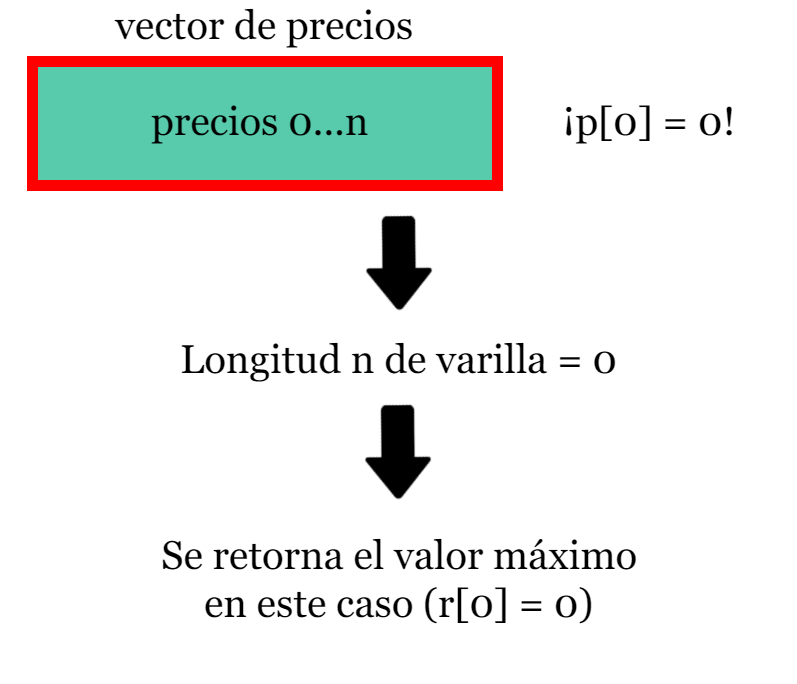

**Paso inductivo ($m < n$):** Luego de comprobar que el caso base sí cumple nuestra hipótesis, ahora comprobamos aquellos casos donde se hace uso de soluciones anteriores. Dentro del algoritmo podemos observar como éste puede funcionar de dos formas dependiendo de la condicional. Así, tenemos $r[n] = max(p[n], p[i] + r[n-i])$, desde donde pueden surgir dos casos:
1. Si $p[n] < p[i] + r[n-i]$, el subproblema r[n-i] ya fue resuelto anteriormente en iteraciones previas, por lo que se retorna el máximo beneficio.
2. En caso contrario, si $p[n] > p[i] + r[n-i]$, se retorna el máximo beneficio del precio correspondiente al largo de la varilla completa.

Puesto que sabemos que los subproblemas anteriores **siempre serán menores a $n$**, gracias a la inducción matemática podemos afirmar que éstos siempre retornarán el valor máximo correcto correspondiente a su posición.

Por lo tanto, y luego de verificar ambos casos como que sí cumplen nuestra hipótesis $P(n)$, es posible afirmar que **CutRod** en su forma de programación dinámica es **correcto**.

#4. Tiempo de ejecución

#5. Experimentos